In [1]:
%run ./naive_classifier.py ./data/csv/combined/clean_data.csv

Using TensorFlow backend.






{0: 0.8499552772808586, 1: 0.9836956521739131, 2: 0.9015654648956357, 3: 1.4332579185520362}

Train on 7602 samples, validate on 2534 samples
Epoch 1/300
7602/7602 [==============================] - 3s 342us/step - loss: 1.1937 - accuracy: 0.4500 - val_loss: 1.4089 - val_accuracy: 0.1839
Epoch 2/300
7602/7602 [==============================] - 1s 117us/step - loss: 0.7017 - accuracy: 0.7080 - val_loss: 1.5735 - val_accuracy: 0.1969
Epoch 3/300
7602/7602 [==============================] - 1s 117us/step - loss: 0.4907 - accuracy: 0.7982 - val_loss: 2.7655 - val_accuracy: 0.1839
Epoch 4/300
7602/7602 [==============================] - 1s 118us/step - loss: 0.4103 - accuracy: 0.8366 - val_loss: 1.8833 - val_accuracy: 0.3153
Epoch 5/300
7602/7602 [==============================] - 1s 118us/step - loss: 0.3319 - accuracy: 0.8608 - val_loss: 0.8345 - val_accuracy: 0.6275
Epoch 6/300
7602/7602 [==============================] - 1s 119us/step - loss: 0.2937 - accuracy: 0.8770 - val_loss: 0.

In [3]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10, 8)

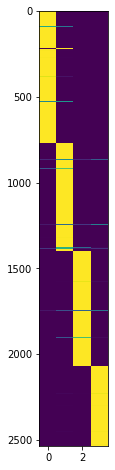

In [4]:
res = classifier.predict(x_test)
order = np.argsort(np.argmax(y_test, axis=1))
plt.imshow(res[order], aspect=0.01)

In [ ]:
'''
bad_good_clsfr = load_model
from keras.models import load_model
bad_good_clsfr = load_model("./data/csv/combined/bads/good_vs_bad_classifier.krs")
bad_good_clsfr.predict(x_test)
bad_good_clsfr.predict(x_test).max()
badness = bad_good_clsfr.predict(x_test)
plt.plot(badness)
plt.hist(badness)
plt.hist(badness)
badness = np.squeeze(bad_good_clsfr.predict(x_test))
badness
x_test[badness<0.8]
x_test_g = x_test[badness<0.8]
res = classifier.predict(x_test_g)
order = np.argsort(np.argmax(y_test[badness<0.8], axis=1))
plt.imshow(res[order], aspect=0.01)
order = np.argsort(np.argmax(y_test[badness<0.6], axis=1))
res = classifier.predict(x_test[badness<0.6])
plt.imshow(res[order], aspect=0.01)
'''

In [102]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px

lda = LinearDiscriminantAnalysis()

lda.fit(np.squeeze(x_train[:,:1550]), np.argmax(y_train, 1))
lda.score(np.squeeze(x_train[:,:1550]), np.argmax(y_train, 1))

xformed_lda = lda.transform(np.squeeze(x_test[:,:1550]))

In [103]:
fig = px.scatter_3d(x=xformed_lda[:,0], y=xformed_lda[:,1], z=xformed_lda[:,2], color=np.argmax(y_test, axis=1), 
                    size=1.0*np.ones(xformed.shape[0]), height=1000)
fig.update_traces(marker=dict(size=2))
fig.show()

In [12]:
print(lda.score(np.squeeze(x_train[:,:1550]), np.argmax(y_train, axis=1)))

print(lda.score(np.squeeze(x_test[:,:1550]), np.argmax(y_test, axis=1)))


0.9888187319126546
0.9534333070244673


In [135]:
import plotly.graph_objects as go
x = np.linspace(100, 4278, 2090)

In [187]:
from scipy.signal import savgol_filter
fig = go.Figure(layout={"height": 800, "width": 1000})
for idx, i in enumerate(lda.coef_):
    fig.add_trace(go.Scatter(x=x, y=savgol_filter(np.abs(i), 11, 3)))
fig.show()

In [62]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.metrics import balanced_accuracy_score

CLFRS = [RandomForestClassifier, AdaBoostClassifier, GaussianNB, SVC, GaussianProcessClassifier]
for CLFR in CLFRS:
    #qda = QuadraticDiscriminantAnalysis(reg_param=0)
    clsfr = CLFR()
    print(clsfr.__class__.__name__)
    clsfr.fit(np.squeeze(x_train[:,:1550]), np.argmax(y_train, 1))
    print(balanced_accuracy_score(clsfr.predict(np.squeeze(x_train[:,:1550])), np.argmax(y_train, 1)))
    print(balanced_accuracy_score(clsfr.predict(np.squeeze(x_test[:,:1550])), np.argmax(y_test, 1)))
    print("_______________________")



RandomForestClassifier


/home/user/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



0.9991830310904787
0.9572027501073919
_______________________
AdaBoostClassifier
0.8484206002445516
0.822627818271464
_______________________
GaussianNB
0.6258197993719137
0.6251044131290299
_______________________
SVC


/home/user/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



0.8255734123057443
0.8193639634292353
_______________________
GaussianProcessClassifier
0.9922955079004601
0.9722728831640328
_______________________


In [69]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100)
pca.fit(np.squeeze(x_train))

for CLFR in CLFRS:
    #qda = QuadraticDiscriminantAnalysis(reg_param=0)
    clsfr = CLFR()
    print(clsfr.__class__.__name__)
    clsfr.fit(pca.transform(np.squeeze(x_train)), np.argmax(y_train, 1))
    print(balanced_accuracy_score(clsfr.predict(pca.transform(np.squeeze(x_train))),
                                  np.argmax(y_train, 1)))
    print(balanced_accuracy_score(clsfr.predict(pca.transform(np.squeeze(x_test))),
                                  np.argmax(y_test, 1)))
    print("_______________________")

RandomForestClassifier


/home/user/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



0.9993649314821564
0.9672207438281883
_______________________
AdaBoostClassifier
0.891460041947673
0.8754179557379971
_______________________
GaussianNB
0.7606309445333234
0.7692482333133296
_______________________
SVC


/home/user/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



0.9551761490458163
0.9517854550450728
_______________________
GaussianProcessClassifier
0.9907974039165592
0.9771584393462074
_______________________


In [147]:
import skkda
kda = skkda.KernelDiscriminantAnalysis(kernel="laplacian")

kda.fit(np.squeeze(x_train[:,:1550]), np.argmax(y_train, 1))

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning:

The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.



KernelDiscriminantAnalysis(coef0=1, degree=3, gamma=None, kernel='laplacian',
                           lmb=0.001)

In [104]:
import plotly.offline as pyo
pyo.init_notebook_mode()

In [186]:
xformed = kda.transform(np.squeeze(x_test[:,:1550]))

fig = px.scatter_3d(x=xformed[:,0], y=xformed[:,1], z=xformed[:,2], color=np.argmax(y_test, axis=1), 
                    size=1.0*np.ones(xformed.shape[0]), height=1000)
fig.update_traces(marker=dict(size=2))
fig.show()

In [149]:
xformed_train = kda.transform(np.squeeze(x_train[:,:1550]))

In [150]:
gnb = GaussianNB()
gnb.fit(xformed_train, np.argmax(y_train, 1))

print(balanced_accuracy_score(gnb.predict(xformed_train), np.argmax(y_train, 1)))
print(balanced_accuracy_score(gnb.predict(xformed), np.argmax(y_test, 1)))

1.0
0.9878613260127853


In [151]:
clfr = SVC(kernel="linear")
clfr.fit(xformed_train, np.argmax(y_train, 1))

print(balanced_accuracy_score(clfr.predict(xformed_train), np.argmax(y_train, 1)))
print(balanced_accuracy_score(clfr.predict(xformed), np.argmax(y_test, 1)))

1.0
0.9850280807657524


In [112]:
np.save("x_train", np.squeeze(x_train))
np.save("x_test", np.squeeze(x_test))
np.save("y_train", y_train.astype(np.float64))
np.save("y_test", y_test.astype(np.float64))

In [161]:
from sklearn.feature_selection import SelectFromModel
selector = SelectFromModel(lda, prefit=True)
selector.transform(np.squeeze(x_train[:,:1550]))

array([[0.67577517, 0.64087349, 0.57914219, ..., 0.07438077, 0.09508222,
        0.07826345],
       [0.30936227, 0.27487071, 0.26346155, ..., 0.21301264, 0.18436076,
        0.1801432 ],
       [0.46456043, 0.41698373, 0.43329532, ..., 0.12634296, 0.11465997,
        0.12920053],
       ...,
       [0.54826889, 0.52123586, 0.51910883, ..., 0.07164118, 0.09604247,
        0.08226944],
       [0.1843389 , 0.16525058, 0.16694398, ..., 0.21035743, 0.1929061 ,
        0.14622035],
       [0.10636289, 0.15646306, 0.1057113 , ..., 0.17892579, 0.18720153,
        0.16786903]])

In [185]:
px.line(x=x[:1550], y=np.abs(selector.get_support()*lda.coef_.sum(axis=0)))

In [220]:
from sklearn.svm import LinearSVC

X, y = np.squeeze(x_train[:,:1550]), np.argmax(y_train, 1)

lsvc = LinearSVC(C=0.05, penalty="l1", dual=False, max_iter=2000).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
lsvc.score(X, y)

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



0.9458037358589845

In [230]:
%store -r weights

In [242]:
fig = go.Figure(layout={"height": 800, "width": 1000})
#for idx, i in enumerate(lsvc.coef_[0:3]):
#    fig.add_trace(go.Scatter(x=x, y=savgol_filter(np.abs(i), 5, 1)))
fig.add_trace(go.Scatter(x=x, y=savgol_filter(np.abs(lsvc.coef_).mean(axis=0), 5, 1), name="LinearSVC"))
fig.add_trace(go.Scatter(x=x, y=savgol_filter(weights, 5, 1), name="BSF"))
fig.show()